# Analysis of the provided model


In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

# helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# fix random seed for reproducibility
seed = 2020
np.random.seed(seed)  

import sklearn as sk
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

2.1.0


In [0]:
# helper functions for visualisation
def plot_history(history):
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Loss minimised by model')
  plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
  plt.legend()

In [0]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive')

    import os

    #!ls '/content/gdrive/My Drive/'
except Exception:
    pass

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# load train and test data
(x_train_all, r_train_all_class), (x_test, r_test_class) = mnist.load_data()
x_train_all = x_train_all.reshape(x_train_all.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# some preprocessing ... convert integers to floating point and rescale them to [0,1] range
x_train_all = x_train_all.astype('float32')
x_test = x_test.astype('float32')
x_train_all /= 255
x_test /= 255

# number of test samples
N_test = x_test.shape[0]

# split off 10000 samples for validation
N_val = 10000
N_train = x_train_all.shape[0] - N_val

# now extract the samples into train, validate and test sets
# set random state to make sure you get the same split each time
x_train, x_val, r_train_class, r_val_class = train_test_split(x_train_all, r_train_all_class, test_size = N_val, random_state=0)

r_train_all = tf.keras.utils.to_categorical(r_train_all_class)
r_train = tf.keras.utils.to_categorical(r_train_class)
r_val = tf.keras.utils.to_categorical(r_val_class)
r_test = tf.keras.utils.to_categorical(r_test_class)

In [0]:
num_classes = 10

def initial_model(lr=0.001):
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(784,), kernel_initializer='he_uniform'))
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])

    return model

In [0]:
checkpoint_dir = "/content/gdrive/My Drive/Colab Notebooks/DL2020/GA1/"
model_savename = checkpoint_dir+"model_model_version_0.1.h5"
checkpoint_path = checkpoint_dir+"cp-{epoch:04d}.ckpt"

# create your model
model = initial_model(lr=0.001)
model.summary()

batch_size = 16
epochs = 20

# modelcheckpoint callback:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 monitor='val_accuracy',
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)

history = model.fit(x_train, r_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [cp_callback],
                    validation_data=(x_val, r_val))

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 16)                12560     
_________________________________________________________________
dense_151 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_152 (Dense)            (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
49808/50000 [============================>.] - ETA: 0s - loss: 0.3941 - accuracy: 0.8843
Epoch 00001: val_accuracy improved from -inf to 0.92890, saving model to /content/gdrive/My Drive/Colab Notebooks/DL2020/GA1/cp-0001.ckpt
50000/50000 [==============================] - 8s 152us/sample - loss: 0.3937 - accuracy: 0

Training set Accuracy:   0.98
Training set Loss: 0.0788

Validation set Accuracy:   0.96
Validation set Loss: 0.1623



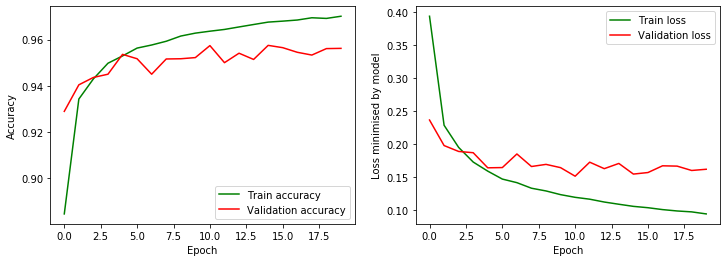

In [0]:
[train_loss, train_accuracy] = model.evaluate(x_train, r_train, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model.evaluate(x_val, r_val, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

plot_history(history)

In [0]:
model = initial_model(lr=0.001)
model.summary()

history = model.fit(x_train_all, r_train_all,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [cp_callback])

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 16)                12560     
_________________________________________________________________
dense_154 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_155 (Dense)            (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3731 - accuracy: 0.8918
Epoch 2/20
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2123 - accuracy: 0.9381
Epoch 3/20
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1843 - accuracy: 0.9457
Epoch 4/20
60000/60000 [========

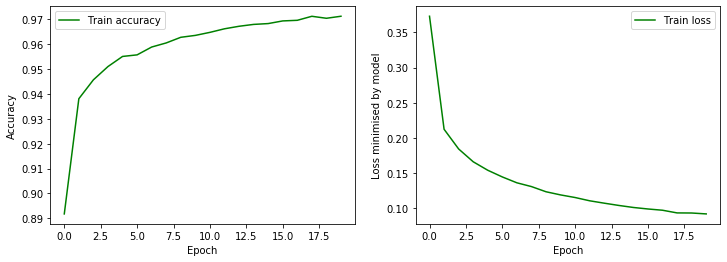

In [0]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
        label='Train accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Loss minimised by model')
plt.plot(history.epoch, np.array(history.history['loss']),'g-',
        label='Train loss')
plt.legend()

In [0]:
# the file type for storing complete models is ".h5"
# feel free to change the path to whatever suits you best!
modelpath = checkpoint_dir+"final_model.h5"

print("Final model saved as ",modelpath)

# Save entire model to a HDF5 file
model.save(modelpath)

Final model saved as  /content/gdrive/My Drive/Colab Notebooks/DL2020/GA1/final_model.h5


In [0]:
# The code below should give the same results as that for the original model
[train_loss, train_accuracy] = model.evaluate(x_train_all, r_train_all, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model.evaluate(x_test, r_test, verbose=0)
print("Test set Accuracy:{:7.2f}".format(val_accuracy))
print("Test set Loss:{:7.4f}\n".format(val_loss))

Training set Accuracy:   0.98
Training set Loss: 0.0798

Test set Accuracy:   0.96
Test set Loss: 0.1639



# Making the model powerful enough

Define a new model with more layers and more nodes in its layers.

In [0]:
def new_model(lr=0.001):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(784,), kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])
    return model

Make the batch size as high as possible (None means that the whole training set will be used as a single batch, so batch gradient descent instead of minibatch gradient descent).

In [0]:
model = new_model(lr=0.0001)
model.summary()

batch_size = None
epochs = 50

history = model.fit(x_train, r_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [cp_callback],
                    validation_data=(x_val, r_val))

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_157 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_158 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_159 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_160 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_161 (Dense)            (None, 10)                330       
Total params: 131,818
Trainable params: 131,818
Non-trainable params: 0
_______________________________________________

Training set Accuracy:   1.00
Training set Loss: 0.0028

Validation set Accuracy:   0.97
Validation set Loss: 0.1448



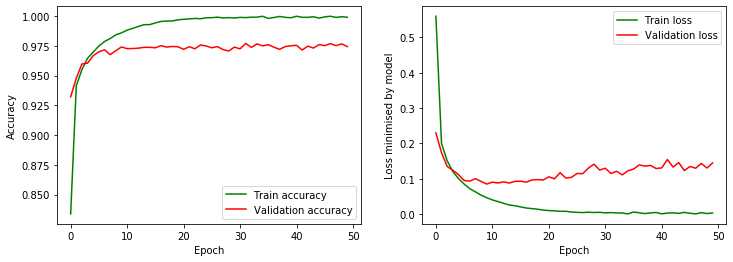

In [0]:
[train_loss, train_accuracy] = model.evaluate(x_train, r_train, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model.evaluate(x_val, r_val, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

plot_history(history)

In [0]:
model = new_model(lr=0.0001)
model.summary()

history = model.fit(x_train_all, r_train_all,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [cp_callback])

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_163 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_164 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_165 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_166 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_167 (Dense)            (None, 10)                330       
Total params: 131,818
Trainable params: 131,818
Non-trainable params: 0
_______________________________________________

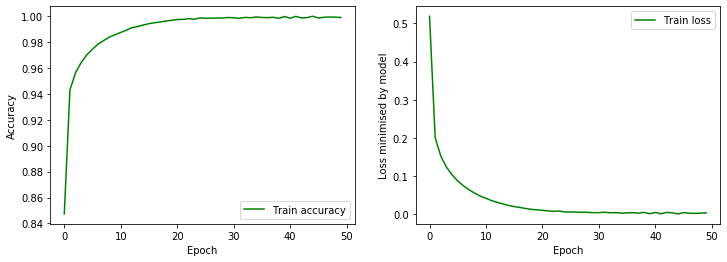

In [0]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
        label='Train accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Loss minimised by model')
plt.plot(history.epoch, np.array(history.history['loss']),'g-',
        label='Train loss')
plt.legend()

In [0]:
# the file type for storing complete models is ".h5"
# feel free to change the path to whatever suits you best!
modelpath = checkpoint_dir+"final_model.h5"

print("Final model saved as ",modelpath)

# Save entire model to a HDF5 file
model.save(modelpath)

Final model saved as  /content/gdrive/My Drive/Colab Notebooks/DL2020/GA1/final_model.h5


In [0]:
[train_loss, train_accuracy] = model.evaluate(x_train_all, r_train_all, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model.evaluate(x_test, r_test, verbose=0)
print("Test set Accuracy:{:7.2f}".format(val_accuracy))
print("Test set Loss:{:7.4f}\n".format(val_loss))

Training set Accuracy:   1.00
Training set Loss: 0.0011

Test set Accuracy:   0.98
Test set Loss: 0.1374



# Regularizing

Create a regularized version of the previous model: L1/2 regularization, early stopping and dropout.

In [0]:
def regularized_model(lr=0.001, regularizer=None, dr=0.1):
    model = Sequential()
    model.add(Dropout(dr))
    model.add(Dense(128, activation='relu', input_shape=(784,), kernel_initializer='he_uniform', kernel_regularizer=regularizer, bias_regularizer=regularizer))
    model.add(Dropout(dr))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizer, bias_regularizer=regularizer))
    model.add(Dropout(dr))
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizer, bias_regularizer=regularizer))
    model.add(Dropout(dr))
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizer, bias_regularizer=regularizer))
    model.add(Dropout(dr))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizer, bias_regularizer=regularizer))
    model.add(Dropout(dr))
    model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizer, bias_regularizer=regularizer))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])
    return model

In [0]:
regularizer = None
#regularizer = tf.keras.regularizers.l1()
#regularizer = tf.keras.regularizers.l2()

dropout_rate = 0.1

model = regularized_model(lr=0.0001, regularizer=regularizer, dr=dropout_rate)
#model.summary()

batch_size = None
epochs = 50

# early stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.0001)

history = model.fit(x_train, r_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [cp_callback],
                    validation_data=(x_val, r_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
49664/50000 [============================>.] - ETA: 0s - loss: 1.1120 - accuracy: 0.6274
Epoch 00001: val_accuracy did not improve from 0.97710
50000/50000 [==============================] - 7s 139us/sample - loss: 1.1083 - accuracy: 0.6287 - val_loss: 0.3457 - val_accuracy: 0.9049
Epoch 2/50
49824/50000 [============================>.] - ETA: 0s - loss: 0.4756 - accuracy: 0.8600
Epoch 00002: val_accuracy did not improve from 0.97710
50000/50000 [==============================] - 7s 131us/sample - loss: 0.4751 - accuracy: 0.8601 - val_loss: 0.2336 - val_accuracy: 0.9318
Epoch 3/50
49952/50000 [============================>.] - ETA: 0s - loss: 0.3577 - accuracy: 0.8980
Epoch 00003: val_accuracy did not improve from 0.97710
50000/50000 [==============================] - 6s 126us/sample - loss: 0.3577 - accuracy: 0.8980 - val_loss: 0.1859 - val_accuracy: 0.9443
Epoch 4/50
49760/50000 [============================>.] - ETA: 0s - 

Training set Accuracy:   1.00
Training set Loss: 0.0072

Validation set Accuracy:   0.98
Validation set Loss: 0.0764



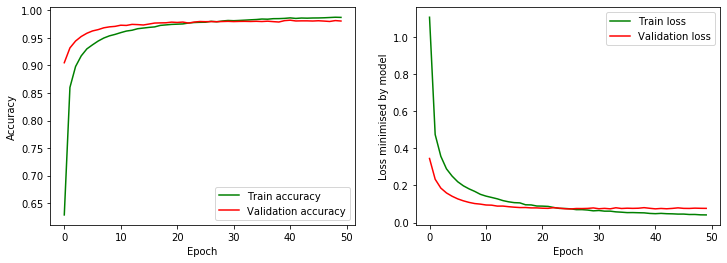

In [0]:
[train_loss, train_accuracy] = model.evaluate(x_train, r_train, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model.evaluate(x_val, r_val, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

plot_history(history)

In [0]:
model = regularized_model(lr=0.0001, regularizer=regularizer, dr=dropout_rate)
#model.summary()

history = model.fit(x_train_all, r_train_all,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [cp_callback])

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 127us/sample - loss: 1.0089 - accuracy: 0.6629
Epoch 2/50
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4190 - accuracy: 0.8786
Epoch 3/50
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3154 - accuracy: 0.9116
Epoch 4/50
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2602 - accuracy: 0.9284
Epoch 5/50
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2214 - accuracy: 0.9381
Epoch 6/50
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1992 - accuracy: 0.9448
Epoch 7/50
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1774 - accuracy: 0.9504
Epoch 8/50
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1635 - accuracy: 0.9543
Epoch 9/50
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1529 - accuracy: 0.9564
Epoch

In [0]:
[train_loss, train_accuracy] = model.evaluate(x_train_all, r_train_all, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model.evaluate(x_test, r_test, verbose=0)
print("Test set Accuracy:{:7.2f}".format(val_accuracy))
print("Test set Loss:{:7.4f}\n".format(val_loss))

Training set Accuracy:   1.00
Training set Loss: 0.0067

Test set Accuracy:   0.98
Test set Loss: 0.0730



In [0]:
# Final Model

print(model.summary())

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_102 (Dropout)        multiple                  0         
_________________________________________________________________
dense_180 (Dense)            multiple                  100480    
_________________________________________________________________
dropout_103 (Dropout)        multiple                  0         
_________________________________________________________________
dense_181 (Dense)            multiple                  16512     
_________________________________________________________________
dropout_104 (Dropout)        multiple                  0         
_________________________________________________________________
dense_182 (Dense)            multiple                  8256      
_________________________________________________________________
dropout_105 (Dropout)        multiple                

# Sandbox

As mentioned in the training notebook, the model is overfitting to the training data. Therefore it is relevant to replot the validation curve.

The initial model will be retrained first.

60000  original train samples
10000  original test samples
Using  50000  train samples,  10000  validation samples and  10000  test samples
Each sample has  784  features
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 150us/sample - loss: 0.4330 - accuracy: 0.8735 - val_loss: 0.2551 - val_accuracy: 0.9265
Epoch 2/10
50000/50000 [==============================] - 7s 140us/sample - loss: 0.2398 - accuracy: 0.9304 - val_loss: 0.2003 - val_accuracy: 0.9390
Epoch 3/10
50000/50000 [==============================] - 7s 147us/sample - loss: 0.2020 - accuracy: 0.9409 - val_loss: 0.1876 - val_accuracy: 0.9401
Epoch 4/10
50000/50000 [==============================] - 7s 140us/sample - loss: 0.1821 - accuracy: 0.9471 - val_loss: 0.1828 - val_accuracy: 0.9452
Epoch 5/10
50000/50000 [==============================] - 7s 136us/sample - loss: 0.1662 - accuracy: 0.9502 - val_loss: 0.1638 - val_accuracy: 0.9481
Epoch 6/10
50000/50000 [=====

Now the training history can be plotted.

Training set Accuracy:   0.97
Training set Loss: 0.1054

Validation set Accuracy:   0.95
Validation set Loss: 0.1523



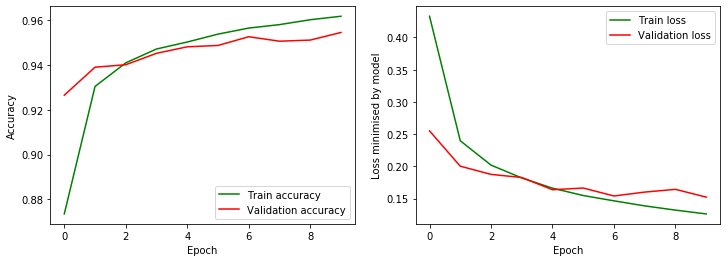

Based on these validation curves, a first possible improvement would be to increase the batch size during training. A larger batch size increases the amount of samples during each training step, which results in a better estimate of the gradient and thus a more stable validation improvement.
A batch size of 32, 64 and 128 will be tested during model training.

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 88us/sample - loss: 0.4673 - accuracy: 0.8642 - val_loss: 0.2492 - val_accuracy: 0.9262
Epoch 2/10
50000/50000 [==============================] - 4s 87us/sample - loss: 0.2397 - accuracy: 0.9321 - val_loss: 0.2031 - val_accuracy: 0.9403
Epoch 3/10
50000/50000 [==============================] - 4s 88us/sample - loss: 0.2050 - accuracy: 0.9416 - val_loss: 0.1959 - val_accuracy: 0.9414
Epoch 4/10
50000/50000 [==============================] - 4s 71us/sample - loss: 0.1822 - accuracy: 0.9480 - val_loss: 0.1834 - val_accuracy: 0.9450
Epoch 5/10
50000/50000 [==============================] - 4s 79us/sample - loss: 0.1699 - accuracy: 0.9512 - val_loss: 0.1777 - val_accuracy: 0.9467
Epoch 6/10
50000/50000 [==============================] - 4s 80us/sample - loss: 0.1576 - accuracy: 0.9539 - val_loss: 0.1716 - val_accuracy: 0.9474
Epoch 7/10
50000/50000 [==============================] 

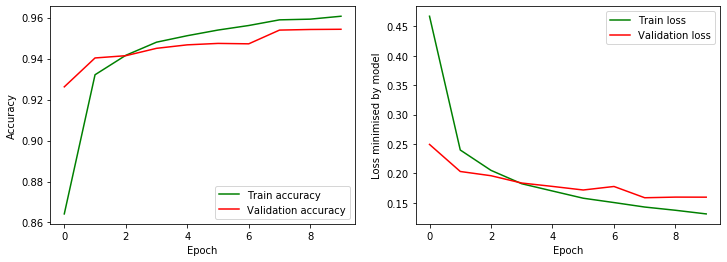

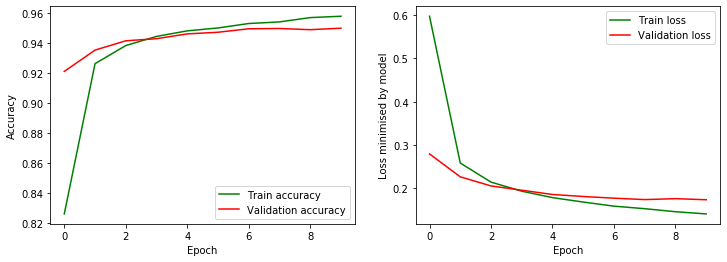

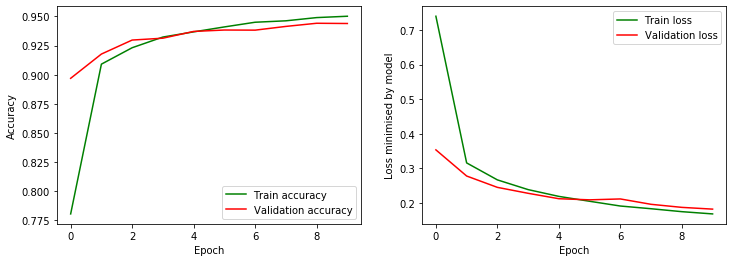

There are no drastic improvements using these batch sizes.
Another way to improve convergence is by lowering the learning rate.
The default learning rate of the Adam optimizer is 0.001. Therefore learning rates of 0.0003 and 0.0001 will be tested during model training, while keeping the batch size at 64.

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 55us/sample - loss: 0.9589 - accuracy: 0.7092 - val_loss: 0.3973 - val_accuracy: 0.8892
Epoch 2/10
50000/50000 [==============================] - 2s 49us/sample - loss: 0.3534 - accuracy: 0.9001 - val_loss: 0.2989 - val_accuracy: 0.9154
Epoch 3/10
50000/50000 [==============================] - 2s 46us/sample - loss: 0.2937 - accuracy: 0.9166 - val_loss: 0.2590 - val_accuracy: 0.9248
Epoch 4/10
50000/50000 [==============================] - 2s 49us/sample - loss: 0.2629 - accuracy: 0.9252 - val_loss: 0.2402 - val_accuracy: 0.9302
Epoch 5/10
50000/50000 [==============================] - 2s 49us/sample - loss: 0.2436 - accuracy: 0.9305 - val_loss: 0.2239 - val_accuracy: 0.9361
Epoch 6/10
50000/50000 [==============================] - 2s 46us/sample - loss: 0.2288 - accuracy: 0.9342 - val_loss: 0.2139 - val_accuracy: 0.9383
Epoch 7/10
50000/50000 [==============================] 

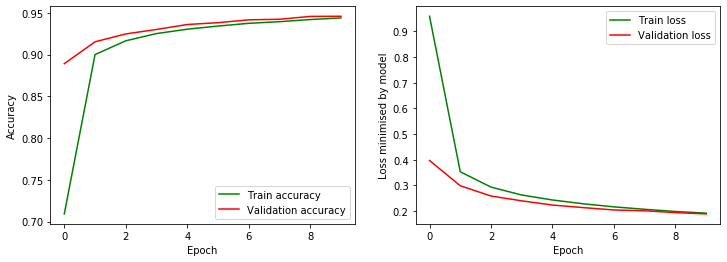

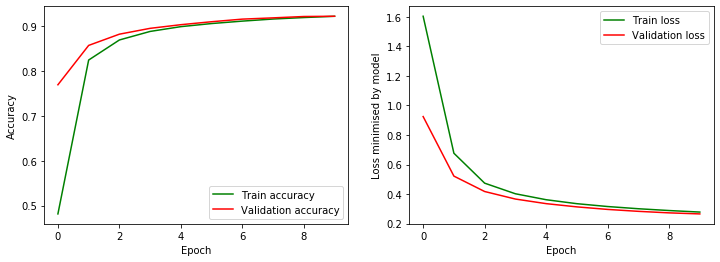

In [0]:
learning_rates = [0.0003,0.0001]
batch_size = 64
for lr in learning_rates:
  model = initial_model(lr=lr)
  model_history = model.fit(x_train, r_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val,r_val)
                    )
  analyse_result_plot(model,model_history)

The two most important observations on these validation curves are:


1.   The model learning converges better
2.   The model learns slower

Therefore, the number of epochs will be increased. The increased training time may result in a significant better model. 
The default learning rate of 0.001 will be tested as well to make a profound comparison.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 65us/sample - loss: 0.6298 - accuracy: 0.8097 - val_loss: 0.2713 - val_accuracy: 0.9198
Epoch 2/50
50000/50000 [==============================] - 3s 56us/sample - loss: 0.2577 - accuracy: 0.9261 - val_loss: 0.2150 - val_accuracy: 0.9370
Epoch 3/50
50000/50000 [==============================] - 3s 57us/sample - loss: 0.2211 - accuracy: 0.9362 - val_loss: 0.2003 - val_accuracy: 0.9405
Epoch 4/50
50000/50000 [==============================] - 2s 47us/sample - loss: 0.1989 - accuracy: 0.9423 - val_loss: 0.1884 - val_accuracy: 0.9438
Epoch 5/50
50000/50000 [==============================] - 2s 47us/sample - loss: 0.1818 - accuracy: 0.9468 - val_loss: 0.1845 - val_accuracy: 0.9442
Epoch 6/50
50000/50000 [==============================] - 2s 45us/sample - loss: 0.1698 - accuracy: 0.9502 - val_loss: 0.1805 - val_accuracy: 0.9442
Epoch 7/50
50000/50000 [==============================] 

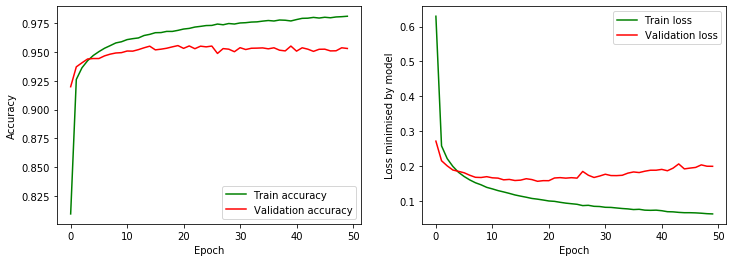

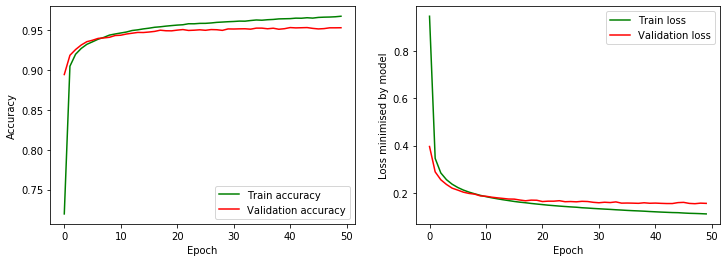

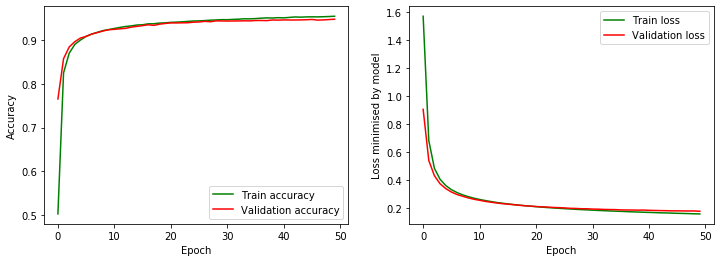

In [0]:
epochs = 50
learning_rates = [0.001,0.0003,0.0001]
for lr in learning_rates:
  model = initial_model(lr=lr)
  model_history = model.fit(x_train, r_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val,r_val)
                    )
  analyse_result_plot(model,model_history)

There are still no significant improvements in validation loss.
The validation curve is more smooth (less fluctuations) though, because the weight updates are more limited, so from now on we will keep the number of epochs fixed at 30 and the learning rate at 0.0003.
There is still a small lack of generalisation, but the model is not completely overfitting to the training data.
To improve both training and validation loss, the model will be made a little more complex by adding some extra fully connected layers and increasing the number of neurons in each layer. These fully connected layers are prone to overfitting, so dropout layers will be added as well.

In [0]:
epochs = 30
learning_rate = 0.0003

def improved_model(neurons=16,dropout_rate=0.01):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(784,), kernel_initializer='he_uniform'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(dropout_rate))
    # 2 extra fully connected layers
    model.add(Dense(neurons, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy']) # save logloss AND accuracy
    return model

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 72us/sample - loss: 0.9899 - accuracy: 0.6858 - val_loss: 0.4610 - val_accuracy: 0.8693
Epoch 2/30
50000/50000 [==============================] - 3s 57us/sample - loss: 0.4990 - accuracy: 0.8514 - val_loss: 0.3492 - val_accuracy: 0.9029
Epoch 3/30
50000/50000 [==============================] - 3s 56us/sample - loss: 0.4124 - accuracy: 0.8771 - val_loss: 0.2985 - val_accuracy: 0.9162
Epoch 4/30
50000/50000 [==============================] - 3s 55us/sample - loss: 0.3643 - accuracy: 0.8910 - val_loss: 0.2640 - val_accuracy: 0.9269
Epoch 5/30
50000/50000 [==============================] - 3s 54us/sample - loss: 0.3359 - accuracy: 0.9008 - val_loss: 0.2470 - val_accuracy: 0.9293
Epoch 6/30
50000/50000 [==============================] - 3s 56us/sample - loss: 0.3075 - accuracy: 0.9091 - val_loss: 0.2325 - val_accuracy: 0.9331
Epoch 7/30
50000/50000 [==============================] 

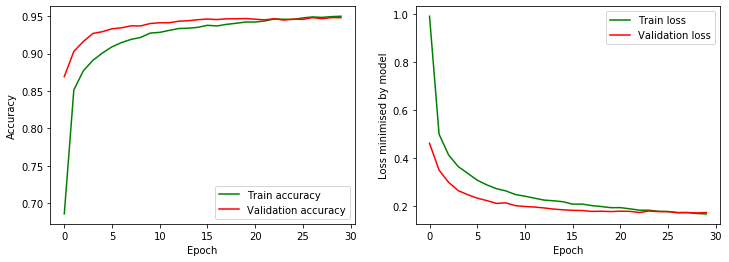

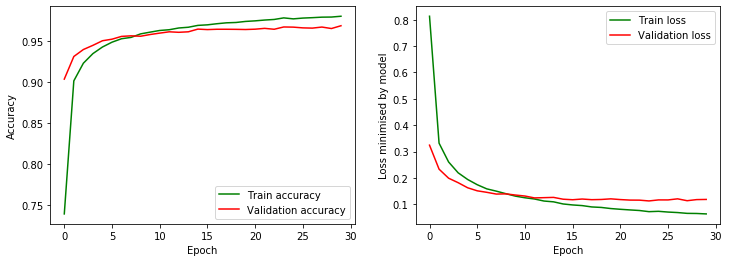

In [0]:
nb_neurons = [16,32]
for nb in nb_neurons:
  improved = improved_model(neurons=nb)
  # Fit to training data and analyze
  improved_history = improved.fit(x_train, r_train,
                                        batch_size=batch_size,
                                        epochs=epochs,
                                        verbose=1,
                                        validation_data=(x_val,r_val)
                                        )
  analyse_result_plot(improved,improved_history)

The model is generalising very well for 16-width neuron layers, due to the dropout layers.
For 32-width neuron layers, to model overfits to the training data. Increasing the dropout rate may result in better generalisation.

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 73us/sample - loss: 0.8270 - accuracy: 0.7434 - val_loss: 0.3009 - val_accuracy: 0.9154
Epoch 2/30
50000/50000 [==============================] - 3s 63us/sample - loss: 0.3131 - accuracy: 0.9075 - val_loss: 0.2172 - val_accuracy: 0.9376
Epoch 3/30
50000/50000 [==============================] - 3s 60us/sample - loss: 0.2446 - accuracy: 0.9274 - val_loss: 0.1832 - val_accuracy: 0.9467
Epoch 4/30
50000/50000 [==============================] - 3s 58us/sample - loss: 0.2067 - accuracy: 0.9388 - val_loss: 0.1653 - val_accuracy: 0.9506
Epoch 5/30
50000/50000 [==============================] - 3s 60us/sample - loss: 0.1846 - accuracy: 0.9439 - val_loss: 0.1503 - val_accuracy: 0.9549
Epoch 6/30
50000/50000 [==============================] - 3s 60us/sample - loss: 0.1642 - accuracy: 0.9506 - val_loss: 0.1444 - val_accuracy: 0.9575
Epoch 7/30
50000/50000 [==============================] 

KeyboardInterrupt: ignored

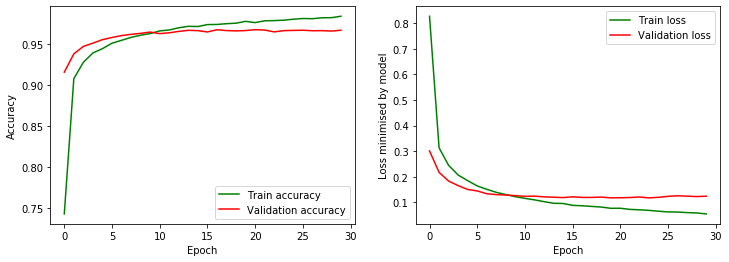

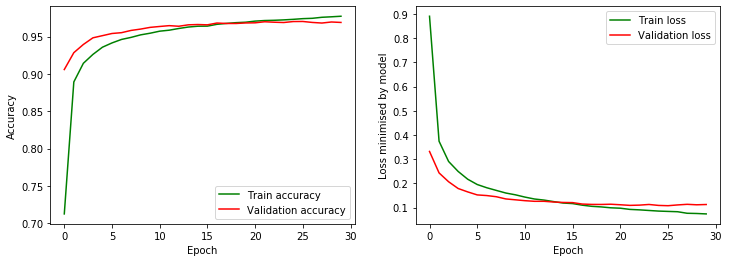

In [0]:
dropout_rates = [0.01,0.03,0.1,0.3]
nb = 32
for dr in dropout_rates:
  improved = improved_model(neurons=nb,dropout_rate=dr)
  # Fit to training data and analyze
  improved_history = improved.fit(x_train, r_train,
                                        batch_size=batch_size,
                                        epochs=epochs,
                                        verbose=1,
                                        validation_data=(x_val,r_val)
                                        )
  analyse_result_plot(improved,improved_history)

Increasing the dropout rate did not help.
The dropout rate will remain fixed at 0.01.
The training and validation loss is still too high.
There is still some bias and variance which can be decreased.
If both statistics have to be improved, a valid solution could be to extract better features from the data. Since it is not yet allowed to use convolutional layers, looking at the misclassified samples where the model prediction is not sure might be inspirational.

In [0]:
dropout_rate = 0.01
improved = improved_model(neurons=nb,dropout_rate=dropout_rate)
improved.fit(x_train,r_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val,r_val))

# Since the model will still be tweaked afterwards, it is analysed on the validation set instead of the test set
predictions = improved.predict(x_val)

# the predictions are class probabilities, 
# the argmax code line below finds the index of the class with the highest probability

val_predicted_class = np.argmax(predictions,axis=1)
misclassified = np.where(val_predicted_class!=r_val_class)[0]

# misclassified is a vector that contains the indices of all misclassified samples

print("There are ",misclassified.shape[0]," misclassified samples in the validation set.")

In [0]:
# this function plots the image with some annotations
def plot_image(predictions, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions),
                                true_label),
                                color=color)


# this function shows the predictions for this sample
def plot_value_array(predictions, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
# probabilities for class that will be predicted
maxprob = np.max(predictions, axis=1)

# find 20 less certain misclassified samples
less_certain = np.argsort(maxprob[misclassified])
less_certain = misclassified[less_certain[:20]]

# now we visualise the samples we found

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  idx=less_certain[i]
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(predictions[idx], r_val_class[idx], np.reshape(x_val[idx],(28,28)))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(predictions[idx], r_val_class[idx])
plt.tight_layout()
plt.show()

In some cases the prediction probability of the correct class is close to the prediction probability of the wrong class, in some cases it is not even close.
Before applying some logic to change the prediction, the most uncertain predictions are plotted as well. Applying logic might change their prediction as well. 

In [0]:
not_misclassified = np.where(val_predicted_class==r_val_class)[0]

# find 20 less certain misclassified samples
less_certain = np.argsort(maxprob[not_misclassified])
less_certain = not_misclassified[less_certain[:20]]

# now we visualise the samples we found

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  idx=less_certain[i]
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(predictions[idx], r_val_class[idx], np.reshape(x_val[idx],(28,28)))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(predictions[idx], r_val_class[idx])
plt.tight_layout()
plt.show()

As can be seen, it is quite risky to change the prediction when the model is uncertain, because the model is already correct sometimes.